## Prediction Of Diabeties

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Data Preperation

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Building

In [3]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50


C:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5141 - loss: 0.7165 - val_accuracy: 0.6423 - val_loss: 0.7278
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - loss: 0.6183 - val_accuracy: 0.6829 - val_loss: 0.6816
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.6176 - val_accuracy: 0.6992 - val_loss: 0.6473
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5699 - val_accuracy: 0.7073 - val_loss: 0.6149
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6880 - loss: 0.6012 - val_accuracy: 0.7073 - val_loss: 0.5878
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7231 - loss: 0.5625 - val_accuracy: 0.7317 - val_loss: 0.5692
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.5396 - val_accuracy: 0.7236 - val_loss: 0.5504
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.4627 - val_accuracy: 0.7317 - val_loss: 0.5336
Epo

### Evaluation

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.77
Confusion Matrix:
[[83 16]
 [19 36]]


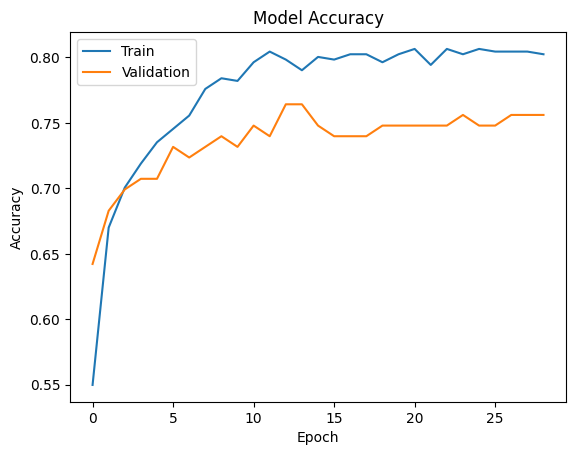

In [4]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Prediction

In [5]:
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
new_data_scaled = scaler.transform(new_data)
prediction = (model.predict(new_data_scaled) > 0.5).astype("int32")

print(f'Prediction for input {new_data[0]}: {"Diabetic" if prediction[0][0] == 1 else "Non-Diabetic"}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for input [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]: Diabetic


C:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
